# Fine-grained Clustering of Documents

## Import Dataset

In [53]:
import pandas as pd

df = pd.read_excel('corpus.xlsx')
df.shape

(2000, 3)

In [54]:
from tqdm.notebook import tqdm
import time

tons = list(range(1000))

#[tons for i in tqdm(range(1000))]

In [55]:
df.head()

ID                                           Headline  \
0  32652  В СГТУ пройдет конференция по современным биои...   
1  32651    Продолжается набор слушателей по программам ДПО   
2  32650  Студент АМФ - серебряный призер Чемпионата Рос...   
3  32643           Сегодня - День Государственного флага РФ   
4  58784  Кафедра рекламы и компьютерного дизайна провод...   

                                                Body  
0  <div id="content-content">\n<div id="node-2692...  
1  <p style="text-align: justify;"><img style="fl...  
2  <p style="text-align: justify;"><img style="fl...  
3  <p style="text-align: justify;"><img style="fl...  
4  \r\n<div style="text-align: justify;">Вниманию...

## Preprocessing XLSX file

Edit sheet

In [56]:
df['new'] = df['Body']              # clone column Body for next changes

In [57]:
body = df['Body'].values.tolist()
body

['<div id="content-content">\n<div id="node-26925" class="node odd full-node node-type-news">\n<div class="content">\n<div id="content-content">\n<div id="node-26887" class="node odd full-node node-type-news">\n<div class="content">\n<p style="text-align: justify;"><img style="float: left;" class="ramka" src="http://www.sstu.ru/files/press/images/20110531161741.jpg" border="0" width="200" height="162" />13-15 октября 2014 г. на базе каф. БМА ФТФ и ФМТМ ИнЭТМ при поддержке Российского фонда фундаментальных исследований будет проходить Всероссийская молодежная научная конференция &laquo;Современные биоинженерные и ядерно-физические технологии в медицине&raquo;.</p>\n<p style="text-align: justify;">Основными целями конференции являются выявление и систематизация актуальных проблем и тенденций в области биоинженерии и связанных с ней прикладных дисциплин, создание условий для обмена результатами исследований, полученными по научным проектам, поддержанным РФФИ, создание условий для выявлени

Delete HTML tags and special chars

In [58]:
df.head()

ID                                           Headline  \
0  32652  В СГТУ пройдет конференция по современным биои...   
1  32651    Продолжается набор слушателей по программам ДПО   
2  32650  Студент АМФ - серебряный призер Чемпионата Рос...   
3  32643           Сегодня - День Государственного флага РФ   
4  58784  Кафедра рекламы и компьютерного дизайна провод...   

                                                Body  \
0  <div id="content-content">\n<div id="node-2692...   
1  <p style="text-align: justify;"><img style="fl...   
2  <p style="text-align: justify;"><img style="fl...   
3  <p style="text-align: justify;"><img style="fl...   
4  \r\n<div style="text-align: justify;">Вниманию...   

                                                 new  
0  <div id="content-content">\n<div id="node-2692...  
1  <p style="text-align: justify;"><img style="fl...  
2  <p style="text-align: justify;"><img style="fl...  
3  <p style="text-align: justify;"><img style="fl...  
4  \r\n<div style="text-align: justify;">Вниманию...

In [59]:
df.iloc[:1,3].to_string(header=False, index=False)

' <div id="content-content">\\n<div id="node-2692...'

In [60]:
import nltk
#nltk.download()

In [61]:
import re

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [62]:
df2 = df['new']
df2.head()

0    <div id="content-content">\n<div id="node-2692...
1    <p style="text-align: justify;"><img style="fl...
2    <p style="text-align: justify;"><img style="fl...
3    <p style="text-align: justify;"><img style="fl...
4    \r\n<div style="text-align: justify;">Вниманию...
Name: new, dtype: object

In [64]:
from tqdm.notebook import tqdm
import time

#data = df.apply(lemmatize)

[df2.apply(lemmatize) for i in tqdm(range(1000))]

#tons = list(range(1000))
#[tons for i in tqdm(range(1000))]

KeyboardInterrupt: 

In [21]:
new = df['new'].values.tolist()
new

['<div id="content-content">\n<div id="node-26925" class="node odd full-node node-type-news">\n<div class="content">\n<div id="content-content">\n<div id="node-26887" class="node odd full-node node-type-news">\n<div class="content">\n<p style="text-align: justify;"><img style="float: left;" class="ramka" src="http://www.sstu.ru/files/press/images/20110531161741.jpg" border="0" width="200" height="162" />13-15 октября 2014 г. на базе каф. БМА ФТФ и ФМТМ ИнЭТМ при поддержке Российского фонда фундаментальных исследований будет проходить Всероссийская молодежная научная конференция &laquo;Современные биоинженерные и ядерно-физические технологии в медицине&raquo;.</p>\n<p style="text-align: justify;">Основными целями конференции являются выявление и систематизация актуальных проблем и тенденций в области биоинженерии и связанных с ней прикладных дисциплин, создание условий для обмена результатами исследований, полученными по научным проектам, поддержанным РФФИ, создание условий для выявлени

In [23]:
import re # регулярные выражения

df['new'] = df['new'].str.lower()                               # приводим к нижнему регистру
df['new'] = df['new'].str.replace(r'[a-z]+', '')                # убираем латиницу
df['new'] = df['new'].str.replace(r'[^\w\s]+', '')              # убираем пунктуацию
df['new'] = df['new'].str.replace(r'[0-9]+', '')                # убираем цифры
df['new'] = df['new'].str.replace('\n', '')                     # убираем оставшиеся символы
df['new'] = df['new'].str.replace('\r', '')
df['new'] = df['new'].str.replace('\t', '')
df['new'] = df['new'].str.replace('\xa0', '')
df['new'] = df['new'].str.replace('_', '')
df['new'] = df['new'].apply(lambda row: re.sub(' +', ' ', row)) # убираем мультипробелы
df['new'] = df['new'].str.strip()                               # убираем пробелы в начале и в конце строки

#df['new'] = df['new'].apply(lambda txt: re.sub(r"</?\[\d+>", "", txt)) # убираем слова длиной < 3
#df['new'] = df['new'].str.replace(r"</?\[\d+>", "")

#[str(x).replace(r"</?\[\d+>", "") for x in df.iloc[0,:]]

df.head()

ID                                           Headline  \
0  32652  В СГТУ пройдет конференция по современным биои...   
1  32651    Продолжается набор слушателей по программам ДПО   
2  32650  Студент АМФ - серебряный призер Чемпионата Рос...   
3  32643           Сегодня - День Государственного флага РФ   
4  58784  Кафедра рекламы и компьютерного дизайна провод...   

                                                Body  \
0  <div id="content-content">\n<div id="node-2692...   
1  <p style="text-align: justify;"><img style="fl...   
2  <p style="text-align: justify;"><img style="fl...   
3  <p style="text-align: justify;"><img style="fl...   
4  \r\n<div style="text-align: justify;">Вниманию...   

                                                 new  
0  октября г на базе каф бма фтф и фмтм инэтм при...  
1  в саратовском государственном техническом унив...  
2  августа года в ставрополе состоялся этап чемпи...  
3  ежегодно августа в россии отмечается день госу...  
4  вниманию студентов и кураторов мфпит марта каф...

In [24]:
'''
i = 1
while i < 2000:
    pre_str = df.iloc[:,3].to_string(header=False, index=False)
    print(*filter(lambda x: len(x) > 2, pre_str.split()))
    i += 1
'''

'\ni = 1\nwhile i < 2000:\n    pre_str = df.iloc[:,3].to_string(header=False, index=False)\n    print(*filter(lambda x: len(x) > 2, pre_str.split()))\n    i += 1\n'

In [26]:
#df['new'] = df['new'].str.replace('\n', '')
#df['new'] = df['new'].str.replace('\r', '')
#df['new'] = df['new'].str.replace('\t', '')
#df['new'] = df['new'].str.replace('\xa0', '')

#remove_words = ['abc', 'div', 'ООО', '\n\xa0«»\t—…']

#pat = r'\b(?:{})\b'.format('|'.join(remove_words))

#pat

#df['new'] = df['Body'].str.replace(pat, '')
#df.head()

NLTK

In [27]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text
text = nltk.Text(text_tokens)
print(type(text))

# Получим список стоп-слов для русского языка
russian_stopwords = stopwords.words("russian")  
russian_stopwords.extend(['это', 'и', 'нем'])

text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
print(text_tokens, type(text_tokens), len(text_tokens))

NameError: name 'text_tokens' is not defined

Задаем свой список стоп слов, исключая 'не'. Далее сцепим 'не' с последующими словами

In [28]:
custom_stop = ['и', 'в', 'во', 'что', 'он', 'на', 'я', 'нас', 'не',
               'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 
               'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 
               'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 
               'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 
               'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 
               'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 
               'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 
               'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 
               'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 
               'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 
               'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 
               'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 
               'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 
               'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 
               'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 
               'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 
               'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 
               'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 
               'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 
               'всегда', 'конечно', 'всю', 'между']

Лемматизация

In [29]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

morph.parse(df['new'])

'''
bag = list()

for text_token in text_tokens:
    p = morph.parse(text_token)[0]
    bag.append(p.normal_form)
print(bag)
'''

AttributeError: 'Series' object has no attribute 'lower'

Подготовим обработанный корпус к сохранению

In [30]:
df.rename(columns={'new': 'Dict_token_freq'}, inplace=True)
df.drop("Body", axis=1, inplace=True) # delete a column Body

df.head()

ID                                           Headline  \
0  32652  В СГТУ пройдет конференция по современным биои...   
1  32651    Продолжается набор слушателей по программам ДПО   
2  32650  Студент АМФ - серебряный призер Чемпионата Рос...   
3  32643           Сегодня - День Государственного флага РФ   
4  58784  Кафедра рекламы и компьютерного дизайна провод...   

                                     Dict_token_freq  
0  октября г на базе каф бма фтф и фмтм инэтм при...  
1  в саратовском государственном техническом унив...  
2  августа года в ставрополе состоялся этап чемпи...  
3  ежегодно августа в россии отмечается день госу...  
4  вниманию студентов и кураторов мфпит марта каф...

Сохраним измененный корпус в новый файл

In [31]:
with pd.ExcelWriter('test.xlsx') as writer: 
    df.to_excel(writer)

## Working with edited corpus

In [1]:
import pandas as pd

df = pd.read_excel('edited_corpus.xlsx')
df.head()

Unnamed: 0  Unnamed: 0.1     ID  \
0           0             0  32652   
1           1             1  32651   
2           2             2  32650   
3           3             3  32643   
4           4             4  58784   

                                            Headline  Num_of_word  \
0  В СГТУ пройдет конференция по современным биои...           86   
1    Продолжается набор слушателей по программам ДПО           42   
2  Студент АМФ - серебряный призер Чемпионата Рос...           39   
3           Сегодня - День Государственного флага РФ          284   
4  Кафедра рекламы и компьютерного дизайна провод...           28   

   Num_unic_tokens                                    Dict_token_freq  
0               67  пройти конференция современный биоинженерный т...  
1               34  продолжаться набор слушатель программа дпо сар...  
2               32  студент амф серебряный призёр чемпионат россия...  
3              175  день государственный флаг ежегодно август росс...  
4               17  кафедра реклама компьютерный дизайн проводить ...

## Prepare for clustering

Сохранение столбца Dict_token_freq в отдельный текстовый файл text.txt

Сохранение столбца Dict_token_freq в list(text)

In [2]:
#text = df['Headline'].values.tolist()
text = df['Dict_token_freq'].values.tolist()
type(text)

list

In [3]:
text

['пройти конференция современный биоинженерный технология октябрь база каф бма фтф фмтм инэтм поддержка российский фонд фундаментальный исследование проходить всероссийский молодёжный научный конференция современный биоинженерный ядерный физический технология медицина основный цель конференция являться выявление систематизация актуальный проблема тенденция область биоинженерия связанный прикладной дисциплина создание условие обмен результат исследование получить научный проект поддержать рффи создание условие выявление одарённый талантливый молодёжь цель дальнейший интеллектуальный развитие профессиональный ориентация развитие связь ведущий научный коллектив цель обмен опыт установление общеполезный связь научно практический сфера определение современный тенденция указанный научный направление общемировой практика',
 'продолжаться набор слушатель программа дпо саратовский государственный технический университет гагарин продолжаться набор слушатель обучение дополнительный профессиональн

## Building a Word Cloud

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='Verdana')

In [5]:
text_raw = " ".join(text)
wordcloud = WordCloud().generate(text_raw)

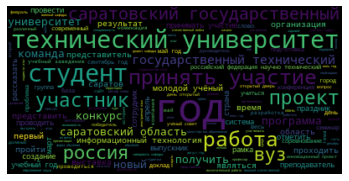

In [6]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Agglomerative Clustering

In [10]:
clusters = ['Conferences',
            'Sport Competitions',
            'Science']

In [11]:
from sklearn.cluster import AgglomerativeClustering

X = df['Dict_token_freq']

agg = AgglomerativeClustering(n_clusters=6)
model = agg.fit_predict(X)

#lt.xlabel("Признак 0")
#plt.ylabel("Признак 1")

ValueError: could not convert string to float: 'пройти конференция современный биоинженерный технология октябрь база каф бма фтф фмтм инэтм поддержка российский фонд фундаментальный исследование проходить всероссийский молодёжный научный конференция современный биоинженерный ядерный физический технология медицина основный цель конференция являться выявление систематизация актуальный проблема тенденция область биоинженерия связанный прикладной дисциплина создание условие обмен результат исследование получить научный проект поддержать рффи создание условие выявление одарённый талантливый молодёжь цель дальнейший интеллектуальный развитие профессиональный ориентация развитие связь ведущий научный коллектив цель обмен опыт установление общеполезный связь научно практический сфера определение современный тенденция указанный научный направление общемировой практика'

## K-means

In [ ]:
from sklearn.cluster import KMeans

# строим модель кластеризации
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

## KD-trees

## Metrics